# **Library Setup**

In [1]:
import pandas as pd
import numpy as np
import glob
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report



# **Data Load and lebeling the data**

In [2]:
import pandas as pd
import os


base_path = "/kaggle/input/datasets/mubashirjawad01/multi-channel-semg-signals-of-hand-gestures" 

# an empty list to store all processed data 
all_subjects_data = []

# matlab code logic from dataset file
fs = 2000  
segment_duration = 6  
rep_coeffs = {0: 4, 1: 138, 2: 272, 3: 406, 4: 540}

print("Starting data processing...\n")

# Starting loop from 1 to 40
for subject_id in range(1, 41):
    # creating file name (like: 1_filtered.csv, 2_filtered.csv)
    file_name = f"{subject_id}_filtered.csv"
    file_path = os.path.join(base_path, file_name)
    
    # checking the file existance 
    if not os.path.exists(file_path):
        print(f"warning: {file_name} not found! skipping...")
        continue
        
    print(f"Subject {subject_id} lebeling the data...")
    
    # data load
    df = pd.read_csv(file_path, header=None)
    df.columns = ['ch1', 'ch2', 'ch3', 'ch4']
    
    df['gesture'] = -1
    df['repetition'] = -1
    df['subject'] = subject_id  # dynamic subject id (1-40)
    
    # gesture and repetition 
    for rep in range(5):
        rep_coeff = rep_coeffs[rep]
        for gesture in range(10):
            start_sec = rep_coeff + (gesture * 10)
            end_sec = start_sec + segment_duration
            
            start_index = start_sec * fs
            end_index = end_sec * fs
            
            df.loc[start_index:end_index-1, 'gesture'] = gesture
            df.loc[start_index:end_index-1, 'repetition'] = rep

    # unnecessary data cleaning and only keeping the gesture data 
    labeled_df = df[df['gesture'] != -1].copy()
    
    # processing and adding to the data list 
    all_subjects_data.append(labeled_df)

# adding all datasets together (Concatenate)
print("\nadding all datasets together...")
final_dataset = pd.concat(all_subjects_data, ignore_index=True)

# saving the final file
output_filename = "all_40_subjects_labeled_data.csv"
final_dataset.to_csv(output_filename, index=False)

print(f"\nprocessing done! total {len(all_subjects_data)}file merged")
print(f"new file name: '{output_filename}'")
print(f"new dataset size: {final_dataset.shape}")

Starting data processing...

Subject 1 lebeling the data...
Subject 2 lebeling the data...
Subject 3 lebeling the data...
Subject 4 lebeling the data...
Subject 5 lebeling the data...
Subject 6 lebeling the data...
Subject 7 lebeling the data...
Subject 8 lebeling the data...
Subject 9 lebeling the data...
Subject 10 lebeling the data...
Subject 11 lebeling the data...
Subject 12 lebeling the data...
Subject 13 lebeling the data...
Subject 14 lebeling the data...
Subject 15 lebeling the data...
Subject 16 lebeling the data...
Subject 17 lebeling the data...
Subject 18 lebeling the data...
Subject 19 lebeling the data...
Subject 20 lebeling the data...
Subject 21 lebeling the data...
Subject 22 lebeling the data...
Subject 23 lebeling the data...
Subject 24 lebeling the data...
Subject 25 lebeling the data...
Subject 26 lebeling the data...
Subject 27 lebeling the data...
Subject 28 lebeling the data...
Subject 29 lebeling the data...
Subject 30 lebeling the data...
Subject 31 lebeling 

In [4]:
final_dataset.head()

,ch1,ch2,ch3,ch4,gesture,repetition,subject
0,-0.008538,-0.022824,0.008150,0.005416,0,0,1
1,-0.007186,-0.015051,-0.001013,0.004787,0,0,1
2,-0.010870,-0.011460,-0.011223,0.003596,0,0,1
3,-0.016778,-0.006743,-0.018296,0.001529,0,0,1
4,-0.022614,0.001419,-0.018439,-0.001502,0,0,1


# **converting the sEMG data to spectogram**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import os

#  Load the labeled dataset (the file you saved previously)
print("Loading data...")
df = pd.read_csv("/kaggle/working/all_40_subjects_labeled_data.csv")
fs = 2000 # Sampling rate

#  Create the main output directory and sub-directories for each gesture
output_dir = "sEMG_Images"
os.makedirs(output_dir, exist_ok=True)
for i in range(10):  # 10 folders for 10 distinct gestures
    os.makedirs(os.path.join(output_dir, f"gesture_{i}"), exist_ok=True)

print("Started generating images... (This might take a while)")

# Group the data by Subject, Repetition, and Gesture
grouped = df.groupby(['subject', 'repetition', 'gesture'])

for (subj, rep, gest), group in grouped:
    # We are using Channel 1 (ch1) data to create the spectrogram.
    # (You can change it to ch2, ch3, or the average of all 4 channels if needed)
    sig = group['ch1'].values
    
    # Generate the spectrogram
    f, t, Sxx = signal.spectrogram(sig, fs=fs, nperseg=256, noverlap=128)
    
    # Plot as an image (without axes or borders to get a pure image)
    plt.figure(figsize=(4, 4))
    
    # Using 'jet' colormap, which represents the signal intensity in blue-red-green colors
    plt.pcolormesh(t, f, 10 * np.log10(Sxx + 1e-10), shading='gouraud', cmap='jet')
    plt.axis('off') # Hide x and y axes
    
    # Save the image
    img_name = f"subj_{subj}_rep_{rep}.png"
    img_path = os.path.join(output_dir, f"gesture_{int(gest)}", img_name)
    
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
    plt.close()

Loading data...
Started generating images... (This might take a while)


# **Converting the sEMG data to Signal Graph**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 1. Load the labeled dataset
print("Loading data...")
df = pd.read_csv("all_40_subjects_labeled_data.csv")

# 2. Create the main output directory and sub-directories for each gesture
output_dir = "sEMG_Signal_Plots"
os.makedirs(output_dir, exist_ok=True)
for i in range(10):  # 10 folders for 10 distinct gestures
    os.makedirs(os.path.join(output_dir, f"gesture_{i}"), exist_ok=True)

print("Started generating signal plot images... (This might take a while)")

# 3. Group the data by Subject, Repetition, and Gesture
grouped = df.groupby(['subject', 'repetition', 'gesture'])

for (subj, rep, gest), group in grouped:
    
    sig_ch1 = group['ch1'].values
    sig_ch2 = group['ch2'].values
    sig_ch3 = group['ch3'].values
    sig_ch4 = group['ch4'].values
    
    # Plot as an image (4x4 inches size)
    plt.figure(figsize=(4, 4))
    
    # plotting with different colors 
    plt.plot(sig_ch1, color='blue', alpha=0.8, linewidth=0.5)
    plt.plot(sig_ch2, color='red', alpha=0.8, linewidth=0.5)
    plt.plot(sig_ch3, color='green', alpha=0.8, linewidth=0.5)
    plt.plot(sig_ch4, color='orange', alpha=0.8, linewidth=0.5)
    
    plt.axis('off') # Hide x and y axes 
    
    # Save the image
    img_name = f"subj_{subj}_rep_{rep}.png"
    img_path = os.path.join(output_dir, f"gesture_{int(gest)}", img_name)
    
    # only saving the plotting 
    plt.savefig(img_path, bbox_inches='tight', pad_inches=0)
    plt.close() # Close the plot to save memory

print(f"All images successfully saved in the '{output_dir}' folder!")

Loading data...
Started generating signal plot images... (This might take a while)
All images successfully saved in the 'sEMG_Signal_Plots' folder!


# **1.1 RGB and HSV Histograms**

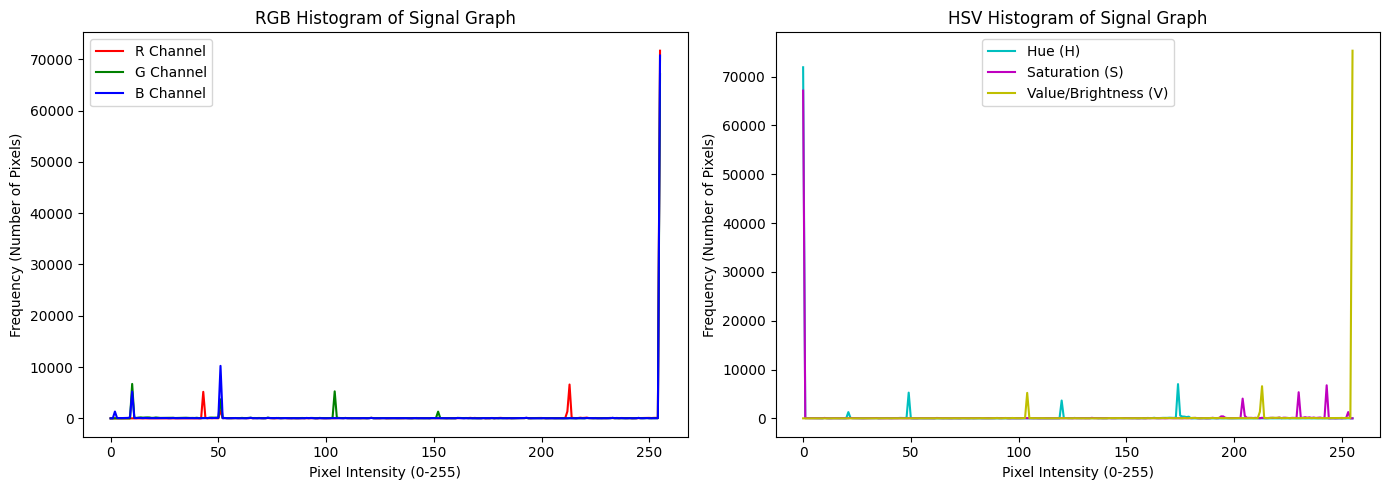

RGB and HSV Histograms saved successfully!


In [8]:
import cv2
import matplotlib.pyplot as plt


sample_image_path = "/kaggle/working/sEMG_Signal_Plots/gesture_1/subj_15_rep_4.png"

if os.path.exists(sample_image_path):
    # Load image
    img_bgr = cv2.imread(sample_image_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Setup the figure
    plt.figure(figsize=(14, 5))

    # Plot RGB Histogram 
    plt.subplot(1, 2, 1)
    colors = ('r', 'g', 'b')
    for i, col in enumerate(colors):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=col, label=f'{col.upper()} Channel')
    plt.title('RGB Histogram of Signal Graph')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency (Number of Pixels)')
    plt.legend()

    # Plot HSV Histogram 
    plt.subplot(1, 2, 2)
    hsv_colors = ('c', 'm', 'y') # Cyan(H), Magenta(S), Yellow(V) for representation
    labels = ('Hue (H)', 'Saturation (S)', 'Value/Brightness (V)')
    for i, (col, label) in enumerate(zip(hsv_colors, labels)):
        hist = cv2.calcHist([img_hsv], [i], None, [256], [0, 256])
        plt.plot(hist, color=col, label=label)
    plt.title('HSV Histogram of Signal Graph')
    plt.xlabel('Pixel Intensity (0-255)')
    plt.ylabel('Frequency (Number of Pixels)')
    plt.legend()

    plt.tight_layout()
    plt.savefig('RGB_HSV_Histograms.png')
    plt.show()
    print("RGB and HSV Histograms saved successfully!")
else:
    print(f"Error: Image not found at {sample_image_path}")

# **1.2.Per-Class Mean and Standard Deviation Plot**

In [13]:
import cv2
import numpy as np
import os
import pandas as pd

def extract_features(img_path):
    img_bgr = cv2.imread(img_path)
    if img_bgr is None: return None
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
    
    mean_hsv, std_hsv = cv2.meanStdDev(img_hsv)
    s_channel = img_hsv[:, :, 1]
    
    return {
        'mean_R': cv2.meanStdDev(img_rgb)[0][0][0], 
        'mean_G': cv2.meanStdDev(img_rgb)[0][1][0], 
        'mean_B': cv2.meanStdDev(img_rgb)[0][2][0],
        'brightness': mean_hsv[2][0],
        'contrast': std_hsv[2][0],
        'sat_clipped_high_pct': (np.sum(s_channel >= 250) / s_channel.size) * 100,
        'sat_clipped_low_pct': (np.sum(s_channel <= 5) / s_channel.size) * 100
    }

dataset_dir = "/kaggle/working/sEMG_Signal_Plots"
all_features = []

print("starting extraction from png file... It may take some time")
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir): continue
        
    for img_name in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_name))
        if features:
            features['class'] = class_name  # এই যে আপনার কাঙ্ক্ষিত 'class' কলাম!
            all_features.append(features)

# নতুন ডেটাসেট তৈরি করে সেভ করা
df_features = pd.DataFrame(all_features)
df_features.to_csv("/kaggle/working/extracted_image_features.csv", index=False)

print("extraction done! new file 'extracted_image_features.csv' created")
print(df_features.columns) 

starting extraction from png file... It may take some time
extraction done! new file 'extracted_image_features.csv' created
Index(['mean_R', 'mean_G', 'mean_B', 'brightness', 'contrast',
       'sat_clipped_high_pct', 'sat_clipped_low_pct', 'class'],
      dtype='object')


In [11]:
import pandas as pd
df = pd.read_csv("/kaggle/working/all_40_subjects_labeled_data.csv")
print(df.columns)

Index(['ch1', 'ch2', 'ch3', 'ch4', 'gesture', 'repetition', 'subject'], dtype='object')


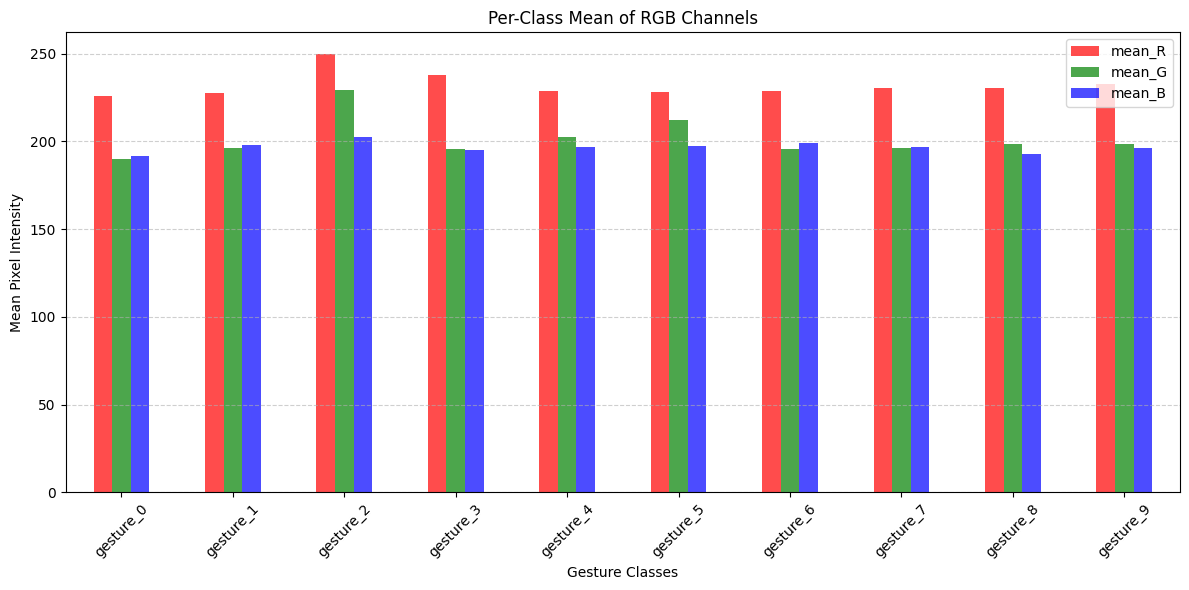

Per-class Mean plot saved successfully!


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

csv_file_path = "/kaggle/working/extracted_image_features.csv" 
df = pd.read_csv(csv_file_path)

# ২. Syntax Warning ঠিক করার জন্য '\d+' এর আগে 'r' যুক্ত করা হলো
df['class_num'] = df['class'].str.extract(r'(\d+)').astype(int)
df = df.sort_values('class_num')

# Calculate mean values grouped by class
class_means = df.groupby('class')[['mean_R', 'mean_G', 'mean_B']].mean().reset_index()

# Setup the plot
class_means.set_index('class').plot(kind='bar', figsize=(12, 6), color=['red', 'green', 'blue'], alpha=0.7)

plt.title('Per-Class Mean of RGB Channels')
plt.xlabel('Gesture Classes')
plt.ylabel('Mean Pixel Intensity')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('Per_Class_Mean_RGB.png')
plt.show()
print("Per-class Mean plot saved successfully!")

# **1.3.Brightness and Contrast Spread (Scatter Plot)**

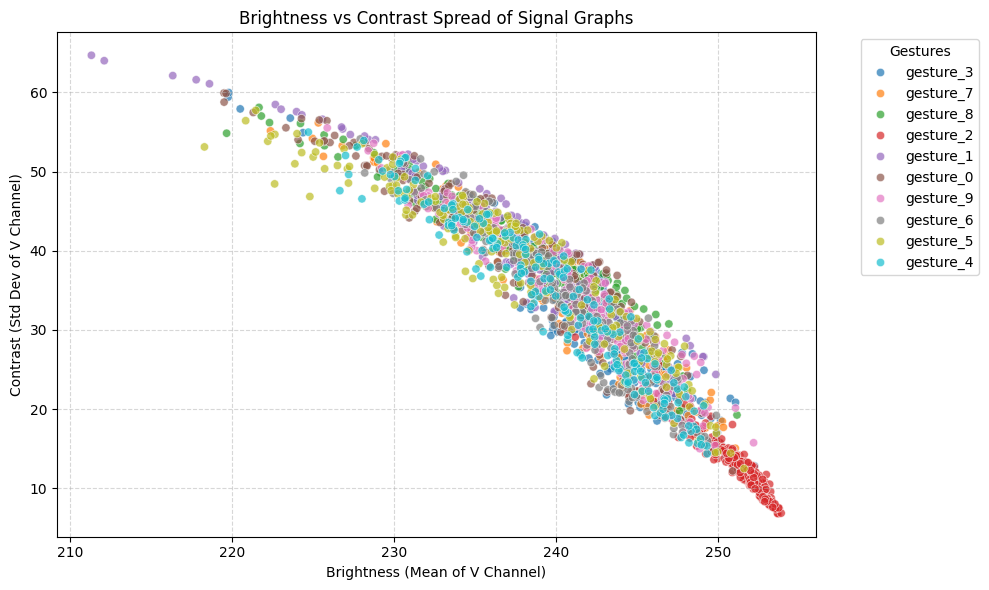

Brightness and Contrast Spread plot saved successfully!


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("extracted_image_features.csv")

plt.figure(figsize=(10, 6))

# Create a scatter plot to show the spread of brightness vs contrast for all images
sns.scatterplot(data=df, x='brightness', y='contrast', hue='class', palette='tab10', alpha=0.7)

plt.title('Brightness vs Contrast Spread of Signal Graphs')
plt.xlabel('Brightness (Mean of V Channel)')
plt.ylabel('Contrast (Std Dev of V Channel)')
plt.legend(title='Gestures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('Brightness_Contrast_Spread.png')
plt.show()
print("Brightness and Contrast Spread plot saved successfully!")

# **1.4.Saturation Clipping Plot** 

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_55/560901852.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['class_num'] = df['class'].str.extract('(\d+)').astype(int)
/tmp/ipykernel_55/560901852.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='sat_clipped_high_pct', palette='Reds')
/tmp/ipykernel_55/560901852.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y='sat_clipped_low_pct', palette='Blues')


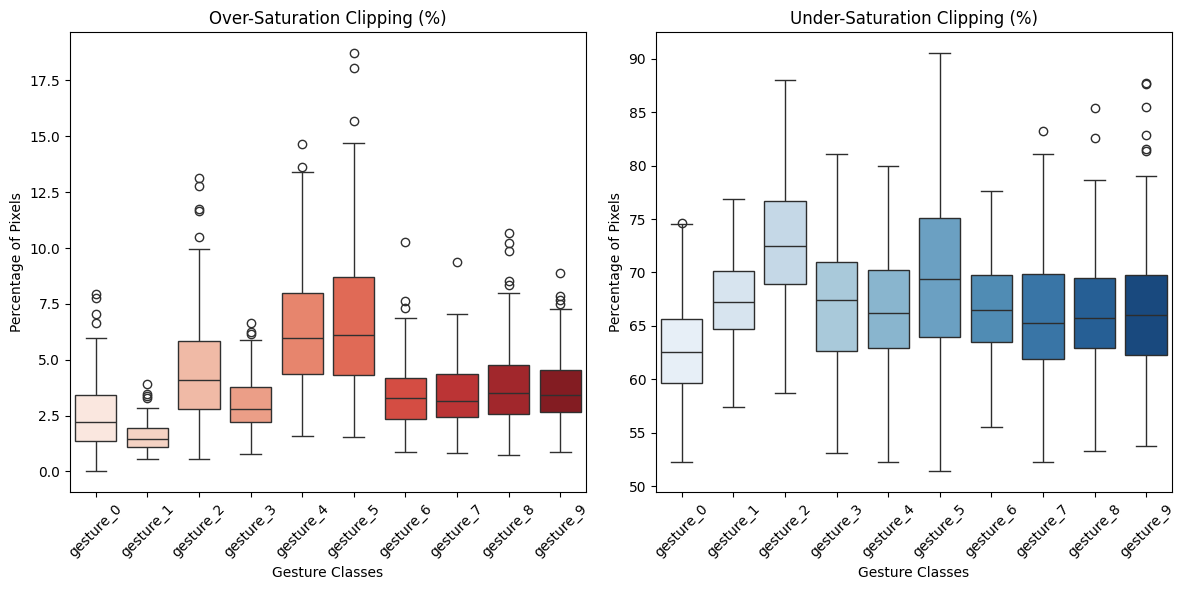

Saturation Clipping plot saved successfully!


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("extracted_image_features.csv")

# Sort classes numerically for better plotting order
df['class_num'] = df['class'].str.extract('(\d+)').astype(int)
df = df.sort_values('class_num')

plt.figure(figsize=(12, 6))

# Plotting High Saturation Clipping (Pixels >= 250)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='class', y='sat_clipped_high_pct', palette='Reds')
plt.title('Over-Saturation Clipping (%)')
plt.xlabel('Gesture Classes')
plt.ylabel('Percentage of Pixels')
plt.xticks(rotation=45)

# Plotting Low Saturation Clipping (Pixels <= 5)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='class', y='sat_clipped_low_pct', palette='Blues')
plt.title('Under-Saturation Clipping (%)')
plt.xlabel('Gesture Classes')
plt.ylabel('Percentage of Pixels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('Saturation_Clipping.png')
plt.show()
print("Saturation Clipping plot saved successfully!")

# **2.resolution and aspect-ratio distributions resizing/padding strategy and class-wise effects**

Calculating Image Ratio and Aspect Ratio...


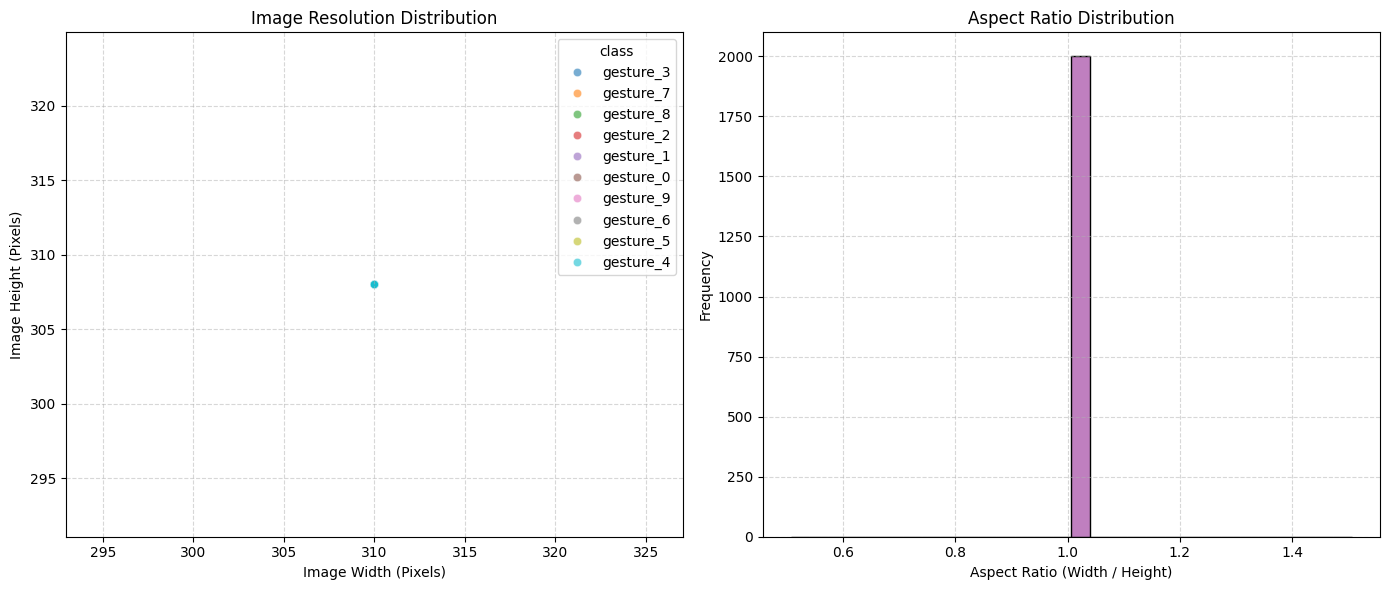

 Resolution and Aspect-Ratio graphs created!
avg Width: 310.00, avg Height: 308.00


In [18]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_dir = "/kaggle/working/sEMG_Signal_Plots"
image_data = []

print("Calculating Image Ratio and Aspect Ratio...")

for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir): continue
        
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            h, w, _ = img.shape
            aspect_ratio = w / h
            image_data.append({
                'class': class_name, 
                'width': w, 
                'height': h, 
                'aspect_ratio': aspect_ratio,
                'img_path': img_path
            })

df_res = pd.DataFrame(image_data)

# 1.Resolution Distribution Plot (Width vs Height) 
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_res, x='width', y='height', hue='class', palette='tab10', alpha=0.6)
plt.title('Image Resolution Distribution')
plt.xlabel('Image Width (Pixels)')
plt.ylabel('Image Height (Pixels)')
plt.grid(True, linestyle='--', alpha=0.5)

# 2. Aspect-Ratio Distribution Plot 
plt.subplot(1, 2, 2)
sns.histplot(data=df_res, x='aspect_ratio', bins=30, kde=True, color='purple')
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio (Width / Height)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('/kaggle/working/Resolution_AspectRatio_Dist.png')
plt.show()

print(" Resolution and Aspect-Ratio graphs created!")
print(f"avg Width: {df_res['width'].mean():.2f}, avg Height: {df_res['height'].mean():.2f}")

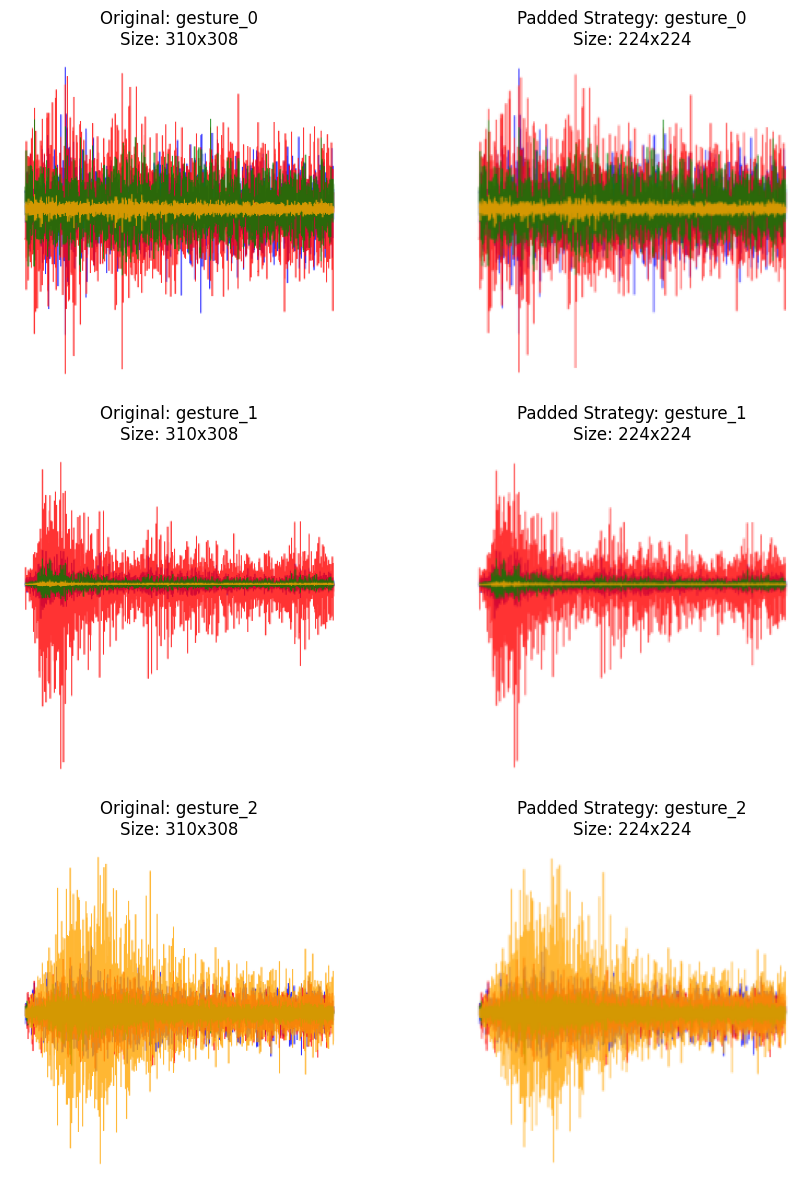

Padding strategy and class-wise effects plotted successfully!


In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

def resize_with_pad(img, target_size=224):
    """
    Function to resize and pad an image to a specific target size 
    while maintaining its original aspect ratio.
    """
    h, w = img.shape[:2]
    
    # Calculate the scaling factor (based on the largest dimension)
    scale = target_size / max(h, w)
    new_w, new_h = int(w * scale), int(h * scale)
    
    # Resize the image using the scaling factor
    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)
    
    # Calculate the padding required to make it a perfect square
    top = (target_size - new_h) // 2
    bottom = target_size - new_h - top
    left = (target_size - new_w) // 2
    right = target_size - new_w - left
    
    # Apply padding with a white border (value=[255, 255, 255])
    padded_img = cv2.copyMakeBorder(resized_img, top, bottom, left, right, 
                                    cv2.BORDER_CONSTANT, value=[255, 255, 255])
    return padded_img

# Selecting 3 different classes to observe the class-wise effect
dataset_dir = "/kaggle/working/sEMG_Signal_Plots"
sample_classes = ['gesture_0', 'gesture_1', 'gesture_2'] # Update based on your folder names
target_size = 224

plt.figure(figsize=(10, 12))

for i, cls in enumerate(sample_classes):
    class_dir = os.path.join(dataset_dir, cls)
    if not os.path.exists(class_dir): continue
        
    # Select a random image from the current class directory
    images = os.listdir(class_dir)
    sample_img_path = os.path.join(class_dir, random.choice(images))
    
    original_img = cv2.imread(sample_img_path)
    original_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    
    # Apply Resizing & Padding using our custom function
    padded_img = resize_with_pad(original_rgb, target_size=target_size)
    
    # 1. Original Image Plot
    plt.subplot(len(sample_classes), 2, 2*i + 1)
    plt.imshow(original_rgb)
    plt.title(f'Original: {cls}\nSize: {original_rgb.shape[1]}x{original_rgb.shape[0]}')
    plt.axis('off')
    
    # 2. Resized + Padded Image Plot
    plt.subplot(len(sample_classes), 2, 2*i + 2)
    plt.imshow(padded_img)
    plt.title(f'Padded Strategy: {cls}\nSize: {padded_img.shape[1]}x{padded_img.shape[0]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('/kaggle/working/Resizing_Padding_Strategy.png')
plt.show()

print("Padding strategy and class-wise effects plotted successfully!")

# **3.sharpness/noise using Laplacian variance and a light noise proxy**

Calculating sharpness and noise... Please wait.


/tmp/ipykernel_55/3130334916.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='class', y='sharpness', palette='viridis')
/tmp/ipykernel_55/3130334916.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_metrics, x='class', y='noise', palette='magma')


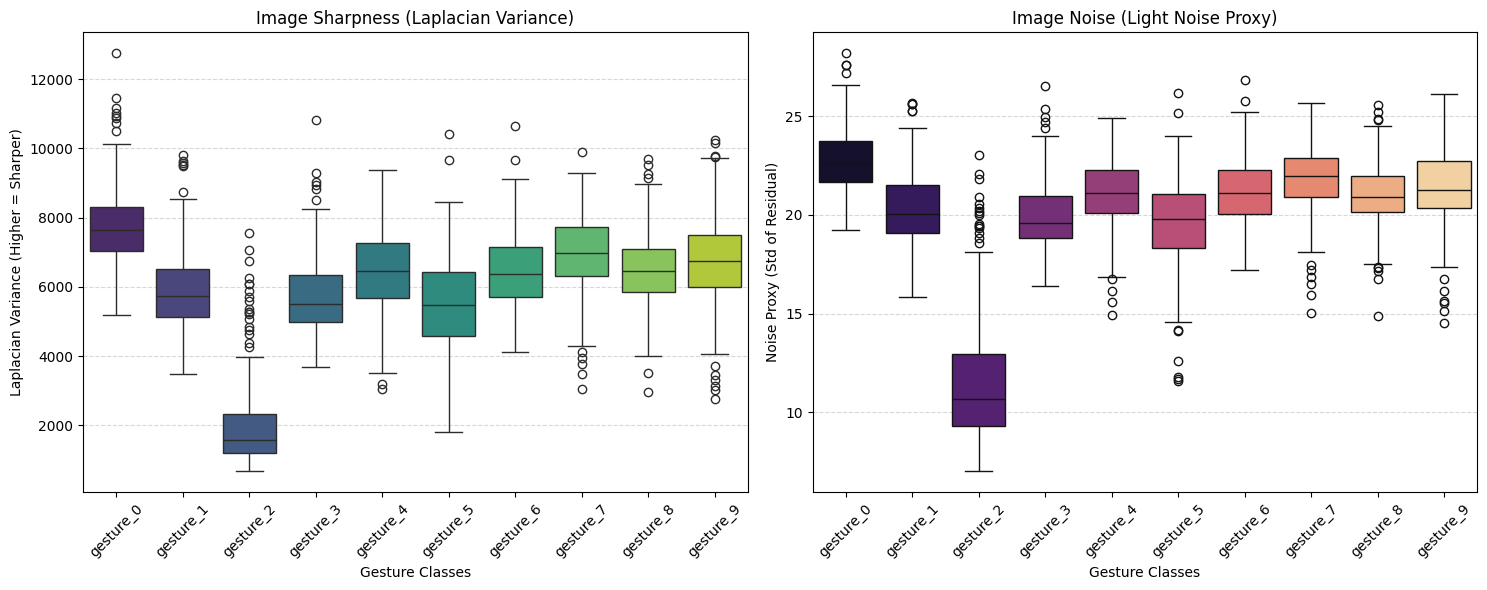

Sharpness and noise proxy successfully measured and plotted!


In [20]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_dir = "/kaggle/working/sEMG_Signal_Plots"
metrics_data = []

print("Calculating sharpness and noise... Please wait.")

# Iterate through each gesture class folder
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.isdir(class_dir): continue
        
    # Iterate through each image in the class folder
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            # Sharpness and noise are usually measured on grayscale images
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # 1. Sharpness: Calculated using Laplacian Variance
            # Measures the variance of the Laplacian (detects edges/focus)
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            
            # 2. Light Noise Proxy: Standard deviation of the residual
            # Residual is the difference between the original and a blurred version
            blurred = cv2.GaussianBlur(gray, (5, 5), 0)
            residual = cv2.absdiff(gray, blurred)
            noise_proxy = np.std(residual)
            
            # Append the calculated metrics to our list
            metrics_data.append({
                'class': class_name,
                'sharpness': laplacian_var,
                'noise': noise_proxy
            })

# Convert the collected data into a Pandas DataFrame
df_metrics = pd.DataFrame(metrics_data)

# Sort the gesture classes numerically (e.g., gesture_0, gesture_1, ...)
df_metrics['class_num'] = df_metrics['class'].str.extract(r'(\d+)').astype(int)
df_metrics = df_metrics.sort_values('class_num')

# --- Plotting the Data ---
plt.figure(figsize=(15, 6))

# Plot 1: Sharpness Distribution (Laplacian Variance) Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df_metrics, x='class', y='sharpness', palette='viridis')
plt.title('Image Sharpness (Laplacian Variance)')
plt.xticks(rotation=45)
plt.xlabel('Gesture Classes')
plt.ylabel('Laplacian Variance (Higher = Sharper)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Plot 2: Noise Proxy Distribution Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_metrics, x='class', y='noise', palette='magma')
plt.title('Image Noise (Light Noise Proxy)')
plt.xticks(rotation=45)
plt.xlabel('Gesture Classes')
plt.ylabel('Noise Proxy (Std of Residual)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
# Save the plot as an image file
plt.savefig('/kaggle/working/Sharpness_Noise_Distribution.png')
plt.show()

print("Sharpness and noise proxy successfully measured and plotted!")

/tmp/ipykernel_55/947999910.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_metrics, x='class', y='noise', palette='muted', inner="quartile")
/tmp/ipykernel_55/947999910.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_metrics, x='class', y='noise', palette='dark', size=3, alpha=0.7)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the mar

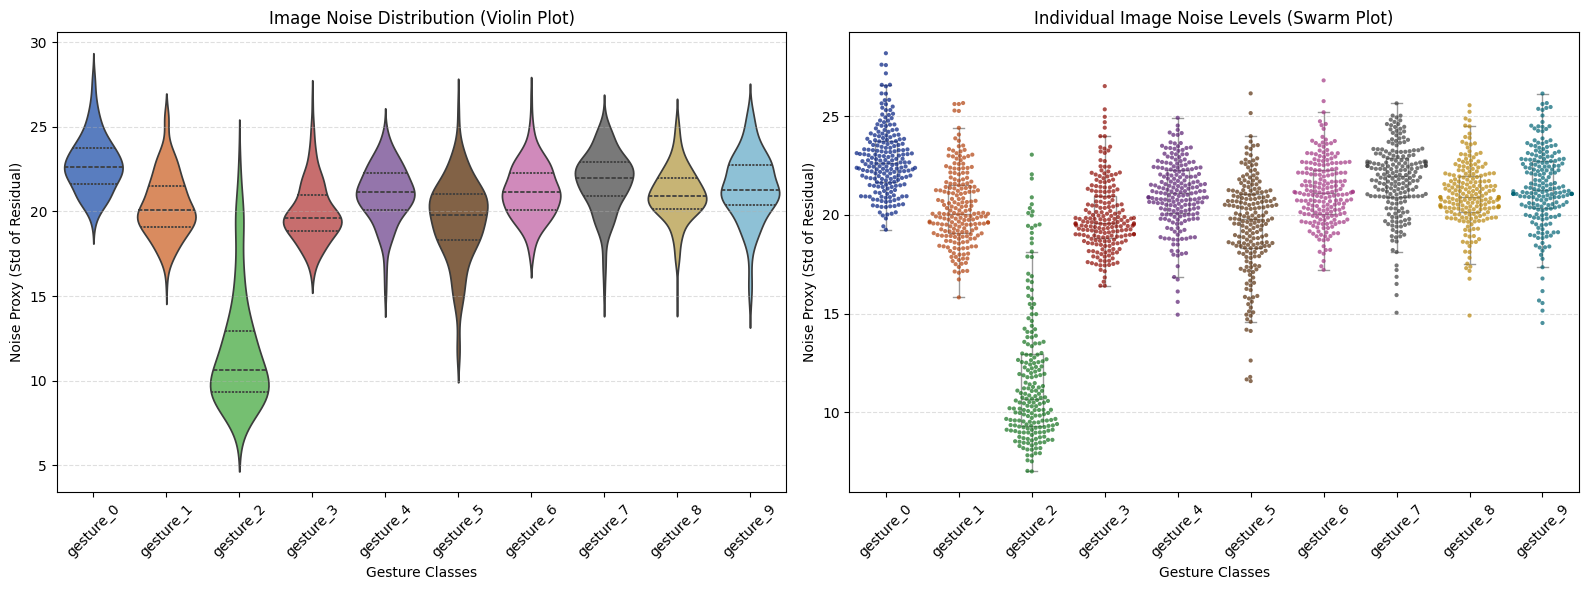

Alternative noise plots (Violin & Swarm) generated successfully!


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

#  1: Violin Plot
plt.subplot(1, 2, 1)
# Violin plot shows the density of the noise distribution
sns.violinplot(data=df_metrics, x='class', y='noise', palette='muted', inner="quartile")
plt.title('Image Noise Distribution (Violin Plot)')
plt.xticks(rotation=45)
plt.xlabel('Gesture Classes')
plt.ylabel('Noise Proxy (Std of Residual)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

#  2: Swarm Plot (Individual Data Points) 
plt.subplot(1, 2, 2)
# Swarm plot shows every single image as a dot, preventing overlap
sns.swarmplot(data=df_metrics, x='class', y='noise', palette='dark', size=3, alpha=0.7)
# Overlay a transparent boxplot to show the median and range clearly
sns.boxplot(data=df_metrics, x='class', y='noise', color='white', width=0.3, fliersize=0)

plt.title('Individual Image Noise Levels (Swarm Plot)')
plt.xticks(rotation=45)
plt.xlabel('Gesture Classes')
plt.ylabel('Noise Proxy (Std of Residual)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
# Save the alternative plots
plt.savefig('/kaggle/working/Noise_Alternative_Plots.png')
plt.show()

print("Alternative noise plots (Violin & Swarm) generated successfully!")

Loading dataset for splitting analysis...


/tmp/ipykernel_55/859457909.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_images, x='gesture', palette='viridis')


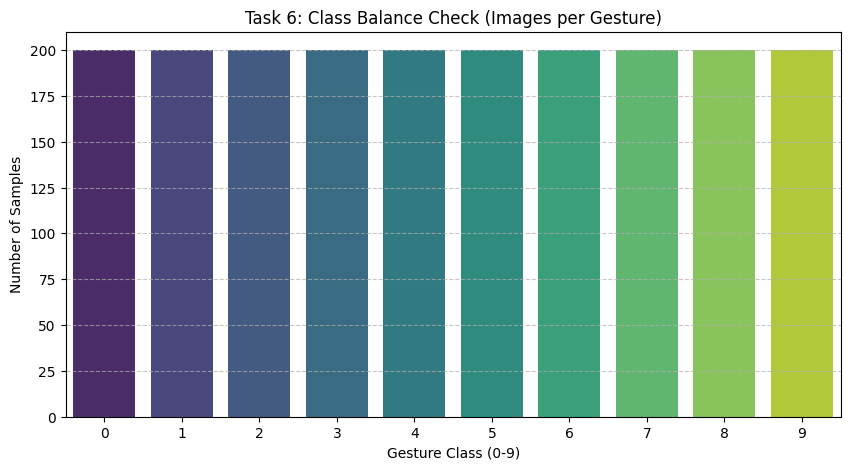


Performing Leakage-Free Split (Grouped by Subject ID)...
Total Images: 2000
Training Set: 1600 images (Subjects: 32)
Testing Set: 400 images (Subjects: 8)
✅ SAFEGUARD PASSED: Zero data leakage between train and test sets!


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit

# 1. Load your master CSV
print("Loading dataset for splitting analysis...")
try:
    df = pd.read_csv("all_40_subjects_labeled_data.csv")
except FileNotFoundError:
    print("CSV not found. Please ensure 'all_40_subjects_labeled_data.csv' is generated.")
    # Fallback to a mock dataframe structure for demonstration if file is missing
    df = pd.DataFrame({
        'subject': np.repeat(np.arange(1, 41), 50),
        'gesture': np.tile(np.repeat(np.arange(10), 5), 40),
        'repetition': np.tile(np.arange(5), 400)
    })

# Extract unique image identifiers (Subject, Gesture, Repetition)
# Since your images are saved per repetition, we group by these to get our image list
df_images = df[['subject', 'gesture', 'repetition']].drop_duplicates().reset_index(drop=True)

# ---------------------------------------------------------
# TASK 6: CLASS BALANCE CHECK
# ---------------------------------------------------------
plt.figure(figsize=(10, 5))
sns.countplot(data=df_images, x='gesture', palette='viridis')
plt.title('Task 6: Class Balance Check (Images per Gesture)')
plt.xlabel('Gesture Class (0-9)')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('/kaggle/working/Class_Balance.png', bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# TASK 7: LEAKAGE SAFEGUARDS (Subject-Wise Split)
# ---------------------------------------------------------
print("\nPerforming Leakage-Free Split (Grouped by Subject ID)...")

# GroupShuffleSplit ensures that all records for a specific subject 
# end up in EITHER train OR test, never both.
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)

# We use 'subject' as the grouping parameter
train_idx, test_idx = next(gss.split(df_images, groups=df_images['subject']))

train_data = df_images.iloc[train_idx]
test_data = df_images.iloc[test_idx]

print(f"Total Images: {len(df_images)}")
print(f"Training Set: {len(train_data)} images (Subjects: {train_data['subject'].nunique()})")
print(f"Testing Set: {len(test_data)} images (Subjects: {test_data['subject'].nunique()})")

# Verify no leakage occurred
train_subjects = set(train_data['subject'].unique())
test_subjects = set(test_data['subject'].unique())
leakage = train_subjects.intersection(test_subjects)

if len(leakage) == 0:
    print("✅ SAFEGUARD PASSED: Zero data leakage between train and test sets!")
else:
    print(f"⚠️ WARNING: Leakage detected for subjects: {leakage}")